# Maps with pycartociudad

## Prepare dependencies

In [ ]:
%pip install folium
%pip install pycartociudad

In [1]:
import folium
import pycartociudad as pycc
from matplotlib import pyplot as plt

In [2]:
# This cell to be run until next version of pycartociudad in PyPi
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()) + '/pycartociudad')
import get_map

Let's imagine we want to get a map centered on a known address, in this case we could use the pycartociudad geocode function as:

In [5]:
address_data = pycc.geocode(input('Introduzca dirección para búsqueda: '))

Introduzca dirección para búsqueda: plaza mayor 1, madrid


## Static maps with pycartociudad

The get_map function allows getting an static image centered in this address, and with a size we can select (by setting the radius parameter to the image radius in km).

In [6]:
# This code to be run until next version of pycartociudad in PyPi
#img = pycc.get_map((address_data['lat'], address_data['lng']), float(input("Radio en km: ")), postLayer=True)
# This code to be run with current version of pycartociudad in PyPi
img = get_map.get_map((address_data['lat'], address_data['lng']), float(input("Radio en km: ")), postLayer=True)

Radio en km: 0.5


We can now display this static map image using matplotlib, for example.

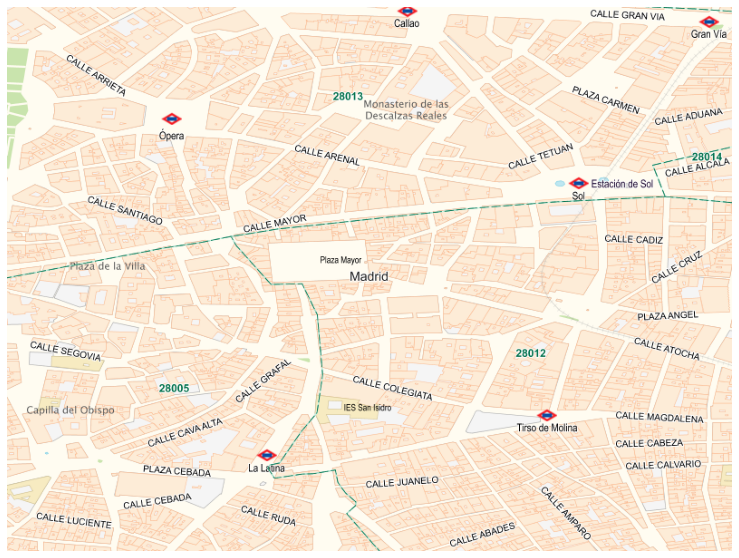

In [7]:
plt.figure(figsize = (20,10))
plt.axis('off')
plt.imshow(img)

## Interactive maps with Folium

Using the folium package, we can display interactive maps, either from the tiles maps available within Folium, or using the cached tiles from the IGN (Instituto Geográfico Nacional), as in the following example.

In [8]:
m = folium.Map(
    location=[address_data['lat'], address_data['lng']],
    zoom_start=15,
    tiles=None,
)

folium.raster_layers.TileLayer(
    name="IGN",
    tiles="https://www.ign.es/wmts/mapa-raster?request=getTile&layer=MTN&TileMatrixSet=GoogleMapsCompatible&TileMatrix={z}&TileCol={x}&TileRow={y}&format=image/jpeg",
    attr="IGN",
).add_to(m)

We can even add a marker to highlight where our address is

In [9]:
folium.Marker([address_data['lat'], address_data['lng']]).add_to(m)

Now if we display the map created with folium, we will see an interactive map centered on our address where we can zoom in or out.

In [10]:
m